In [1]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib ipympl

In [2]:
# parameters
datadir = 'data'
filename = 'AEP_hourly.csv'

In [3]:
data = pd.read_csv(('%s/%s')%(datadir,filename), parse_dates=['Datetime'], index_col=[0], squeeze=True)
print(data.describe())
print(data.head())
print(data.tail())

count    121273.000000
mean      15499.513717
std        2591.399065
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: AEP_MW, dtype: float64
Datetime
2004-12-31 01:00:00    13478.0
2004-12-31 02:00:00    12865.0
2004-12-31 03:00:00    12577.0
2004-12-31 04:00:00    12517.0
2004-12-31 05:00:00    12670.0
Name: AEP_MW, dtype: float64
Datetime
2018-01-01 20:00:00    21089.0
2018-01-01 21:00:00    20999.0
2018-01-01 22:00:00    20820.0
2018-01-01 23:00:00    20415.0
2018-01-02 00:00:00    19993.0
Name: AEP_MW, dtype: float64


The dataset starts on friday 1st, october 2004 and ends in friday 3rd, august 2018, maybe it is a good idea to have whole weeks and trim the dataset to start on monday 4th, october 2004 and finish at sunday 29th, july 2018

In [4]:
data = data.sort_index()
# trim the data to have whole weeks starting on monday
data.drop(data[:'2004-10-3'].index, inplace=True)
data.drop(data['2018-07-30':].index, inplace=True)
print(data.head(10))
print(data.tail(10))

Datetime
2004-10-04 00:00:00    12351.0
2004-10-04 01:00:00    11817.0
2004-10-04 02:00:00    11408.0
2004-10-04 03:00:00    11261.0
2004-10-04 04:00:00    11247.0
2004-10-04 05:00:00    11414.0
2004-10-04 06:00:00    12283.0
2004-10-04 07:00:00    13862.0
2004-10-04 08:00:00    14864.0
2004-10-04 09:00:00    15046.0
Name: AEP_MW, dtype: float64
Datetime
2018-07-29 14:00:00    15496.0
2018-07-29 15:00:00    15937.0
2018-07-29 16:00:00    16209.0
2018-07-29 17:00:00    16464.0
2018-07-29 18:00:00    16645.0
2018-07-29 19:00:00    16414.0
2018-07-29 20:00:00    15997.0
2018-07-29 21:00:00    15616.0
2018-07-29 22:00:00    15476.0
2018-07-29 23:00:00    14665.0
Name: AEP_MW, dtype: float64


In [5]:
# save trimed file
data.to_csv(('%s/%s')%(datadir,'AEP_hourly_trimed.csv'), header=True)

# plot parameters
size = (15,10)
grd=True

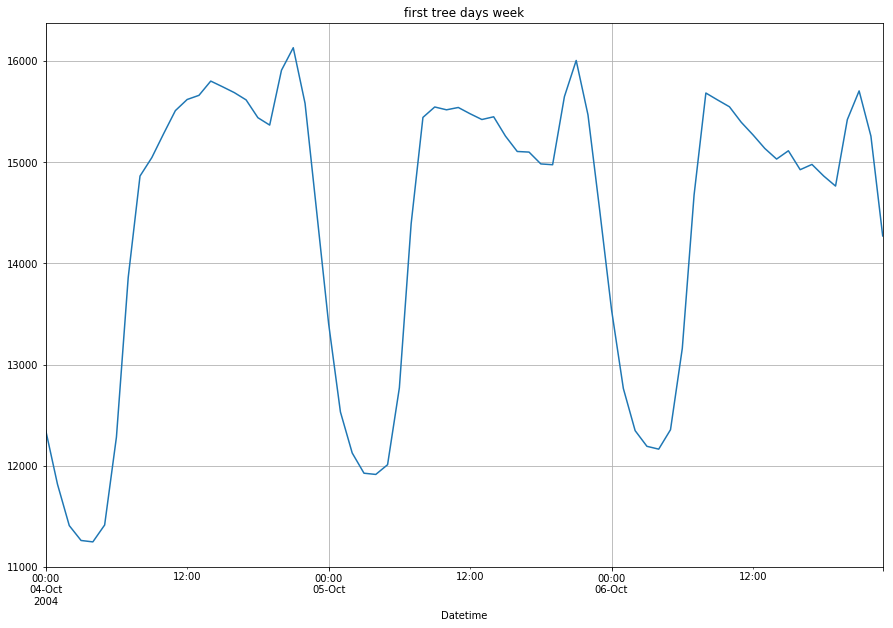

In [6]:
data[:24*(3)].plot(title="first tree days week",figsize=size, grid=grd)
plt.show()

The first tree days of the dataset are shown, as it can be seen the energy consumption decreases in the night, it makes sense since everyone is suppouse to be asleep, after decreasing there is a peak of high consumption that may be the time when people come back home from work so it does at the morning peak.

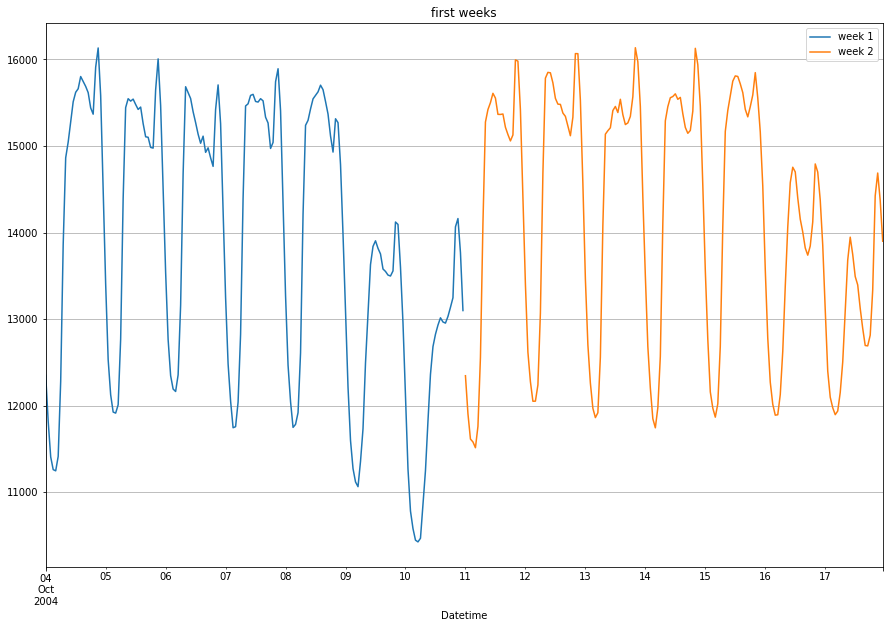

In [7]:
for i in range(2):
    data[24*(7*i):24*(7*(i+1))].plot(title="first weeks",figsize=size, grid=grd, legend=True, label="week "+str(i+1))
plt.show()

In the plot above the first two weeks are shown. Since the dataset starts on monday it is easily seen that the last two days (saturday and sunday) the compsumtion is lower, this may indicate that people spend more time out of their houses on this days. However the pattern of consumptions seems to be preserved as the two peaks of consumption are in the mornings and early nights.

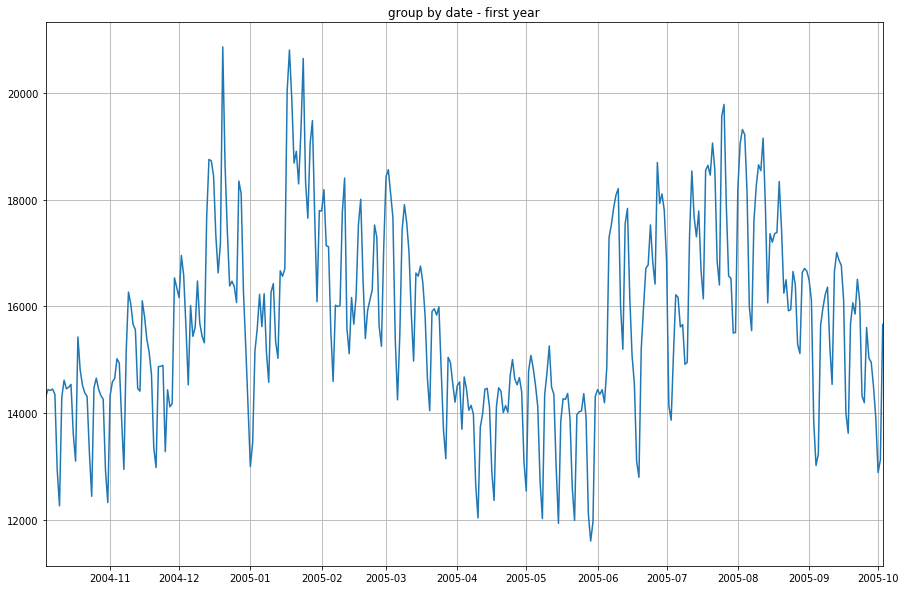

In [8]:
data.groupby(lambda x: x.date).mean()[:365].plot(title="group by date - first year", figsize=size, grid=grd)
plt.show()

Here are plotted the mean consumption by day of the 365 days of the first year in the dataset. Is interesting to observe that the highest peak of consumption is in the month of december, it may be because of the xmas festivities. From April to June there is the lowest consumption of the year, is it due to summer time?. Maybe the consumption could depend on the culture (e.g. holidays). The low peaks, as stated before, belong to the weekends, it can be seen 4 in each month.

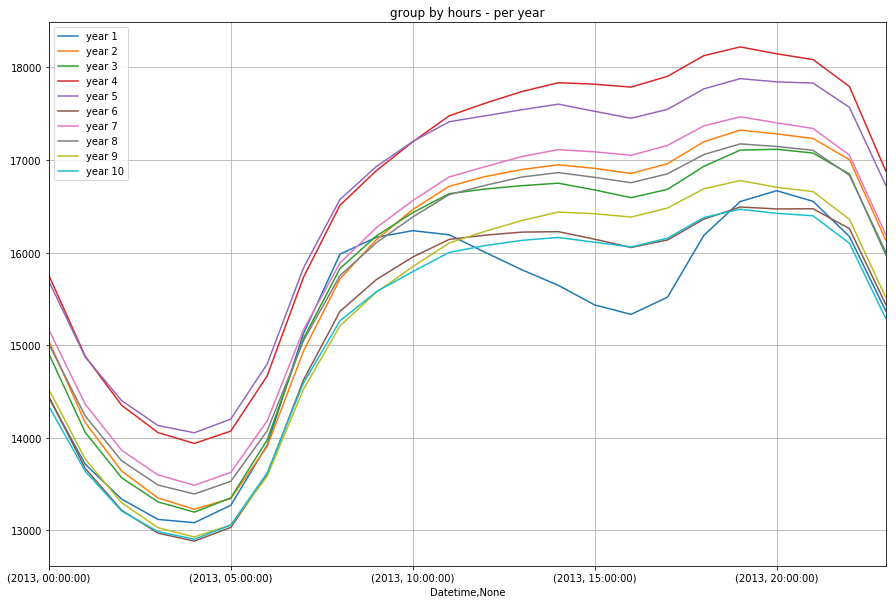

In [9]:
for i in range(10):
    data.groupby([data.index.year,data.index.time]).mean()[24*i:24*(i+1)].plot(title="group by hours - per year", figsize=size, grid=grd, legend=True, label="year "+str(i+1))
plt.show()

This lineplot reflects the mean consumption per hour of the first 10 years, as seen in a previous plot the lowest consumption is presented at nights. The plots seems consistent except for the year 1 (october 2004 - october 2005), there is a kindoff irregular behaviour from 10:00 to 20:00. It would be interesting to do some research on what was happening in that place that year.

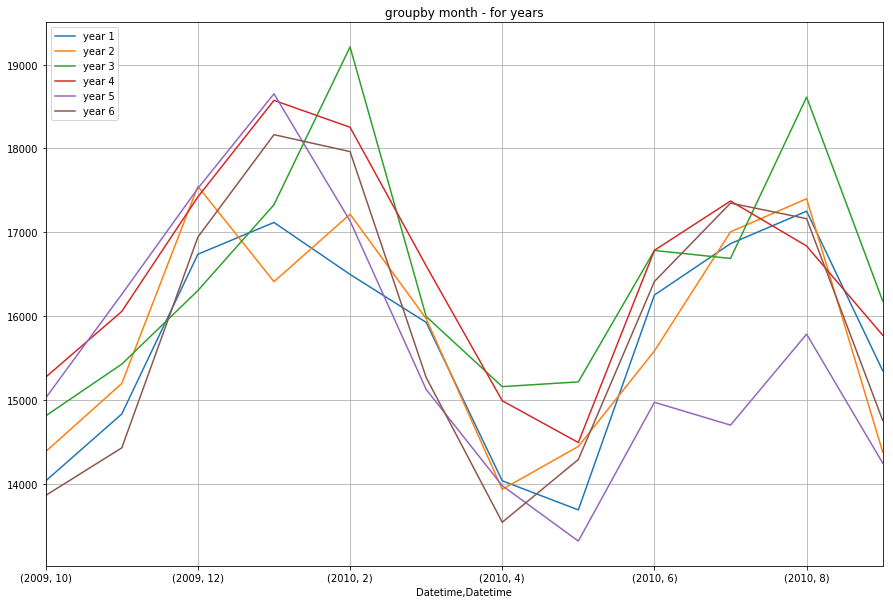

In [10]:
for i in range(6):
    data.groupby([data.index.year,data.index.month]).mean()[12*i:12*(i+1)].plot(title="groupby month - for years",figsize=size, legend=True, label="year "+str(i+1),grid=grd)
plt.show()

This plot shows the average consumption per month. As seen in the year plot by date, the months of higher consumption are those of xmas festivities and the ones with the lowest are from april to july.

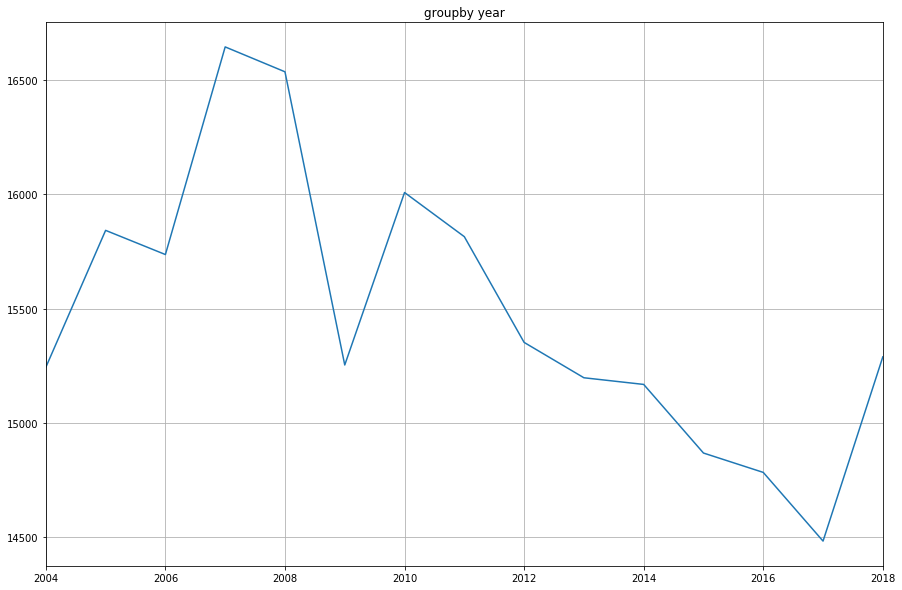

In [11]:
data.groupby(lambda x: x.year).mean().plot(title="groupby year", figsize=size, grid=grd)
plt.show()

In this last plot it can be seen that the average consumption of energy has decreased over the time, except for year 2018, this may be related to the lack of completeness in the data.